<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249F20/)</center>

## Homework Submission
After completed the homework notebook. 
- Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your NetID below.
- `Kernel`$\rightarrow$ `Restart & Run All` (in the menubar).
- You can generated zip file using following command:
    ```python
    NetID=''
    make_submission(NetID)
    ```
- Double-check **generated zip file**, text, math, code, outputs, figures. Re-run if needed.
- Sumbit the zip file via blackboard.
- 1% deduction of late assignment total score per hour passing the deadline.
---------


## Part 4. Neural Network
----
### Problem 4.1
NN for classification
- Implement a Neural Network to classify datapoints

In [1]:
from cs249 import *

#### a. perpare dataset

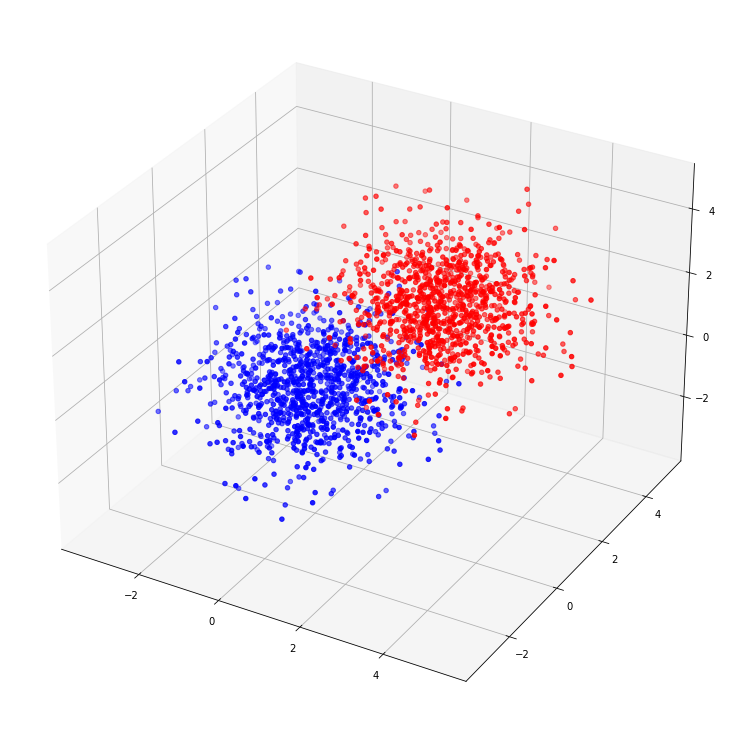

In [2]:
x0, y0 = torch.randn(1000, 20), torch.zeros(1000, 1)
x1, y1 = x0 + 2,torch.ones(1000, 1)
x = torch.cat([x0, x1], dim=0)
y = torch.cat([y0, y1], dim=0)

# display the dataset
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(x0[:, 0], x0[:, 1], x0[:, 2],color='b')
ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2],color='r')
plt.show()

# we'll spilt 70% for training and 30% for testing the performance
train_set, test_set = torch.utils.data.random_split([(i,j) for i,j in zip(x,y)], [int(0.7*len(x)),int(0.3*len(x))])
train_loader = Data.DataLoader(dataset=train_set, batch_size=350, shuffle=True, num_workers=2,)
test_loader=Data.DataLoader(dataset=test_set, batch_size=300, shuffle=True, num_workers=2,)

#### b. define network
- two-layer MLP with 150 hidden units (1$\rightarrow$150$\rightarrow$150$\rightarrow$1)
- non-linear function `LeakyReLU()` should be used after each internal layer
- Remember to choose the right activation function for the output since you are predicting the class number

In [3]:
# Should it be 20 -> 150 -> 150 -> 1? there are 20 features
# since it binary classification, I use Sigmoid activation in the output layer
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()   
        self.lin1 = nn.Linear(n_feature, n_hidden)
        self.lin2 = nn.Linear(n_hidden, n_hidden) 
        self.lin3 = nn.Linear(n_hidden, n_output)
        
    def forward(self, x):   
        x = torch.nn.functional.leaky_relu(self.lin1(x))
        x = torch.nn.functional.leaky_relu(self.lin2(x))
        x = torch.nn.functional.sigmoid(self.lin3(x))
        return x

#### c. training
For training, same as above, we will first define the network, loss function and optimizer. Then calculate the loss wrt the ground-truth and backprop the loss to optimize the network.

You'll need to implement:
    
1. The training process(10 iterations) and display the loss of each iteration(sum of all datapoint for 1 iteration) .
2. This type of dataset is hard to display the visual result, so you only need to output the loss value this time.

In [4]:
net = Net(n_feature=20, n_hidden=150, n_output=1)    
optimizer = torch.optim.Adam(net.parameters(), lr=5e-3)
criterion = nn.BCELoss()

datatiter = iter(train_loader)
data = datatiter.next()
train_x, train_y = data 

datatiter = iter(test_loader)
data = datatiter.next()
test_x, test_y = data 
    
# train the network
losses=[]
for i in tqdm(range(10)):
    # Zero the gradient buffers
    optimizer.zero_grad() 
    # Forward pass
    y_pred = net(train_x)
    # Compute loss
    loss = criterion(y_pred, train_y)
    # Print loss in each iteration
    print('Epoch {}: train loss: {}'.format(i, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.6833251714706421
Epoch 1: train loss: 0.42429396510124207
Epoch 2: train loss: 0.28666579723358154
Epoch 3: train loss: 0.19079843163490295
Epoch 4: train loss: 0.11778288334608078
Epoch 5: train loss: 0.06568130850791931
Epoch 6: train loss: 0.03401218354701996
Epoch 7: train loss: 0.017740443348884583
Epoch 8: train loss: 0.00985718797892332
Epoch 9: train loss: 0.005556643009185791



/Users/fanyangxin/opt/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


#### d. verify
calculate the accuracy (%) of the prediction on the test set

In [5]:
net.eval()
y_pred = net(test_x)
y_pred = (y_pred>0.50).float()
correct = (y_pred == test_y).float().sum()
correct = int(correct)
accuracy = correct/len(test_y)
accuracy = "{:.0%}".format(accuracy)
print("Accuracy is:", accuracy)

Accuracy is: 100%


### Problem 4.2 (CSC 449 ONLY and extra bonus for CSC 249)
NN for regression
- Implement a Neural Network to fit custom functions

#### a. perpare dataset

- We define the custom function as follow, $\epsilon$ is the random noise from an uniform distribution, and we only deal with $x$ in $[-15,15]$
$$
y=0.02 \cdot x^2+sin(x)+0.2\cdot \epsilon\\
x \in [-10,10] ,\epsilon \sim \mathcal{U}[0,1)\
$$


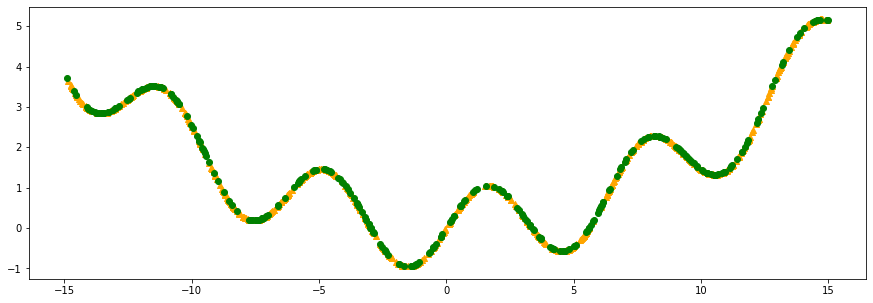

In [6]:
f = lambda x: 0.02*x.pow(2)+torch.sin(x)
# reproducible
torch.manual_seed(1)   
# generate x,y
# x: torch.tensor with torch.Size([1000, 1]) equally sampled from [-15,15]
# y: torch.tensor with torch.Size([1000, 1]) corresponding function value of x
x = 30*torch.rand(1000, 1)-15
y = f(x)

# we'll spilt 70% for training and 30% for testing the performance
# the follow code display the split of dataset, orange for training and green for testing
dataset=[(i,j) for i,j in zip(x,y)]
train_set, test_set = torch.utils.data.random_split(dataset, [int(0.7*len(x)),int(0.3*len(x))])
plt.figure(figsize=(15,5))
plt.scatter(tensor2numpy(train_set,0),tensor2numpy(train_set,1),marker='^',color = "orange")
plt.scatter(tensor2numpy(test_set,0),tensor2numpy(test_set,1),marker='o',color = "green")
plt.show()

#### b. define network
- two-layer MLP with 200 hidden units (1$\rightarrow$200$\rightarrow$200$\rightarrow$1)
- non-linear function `LeakyReLU()` should be used after each internal layer
- please visist https://pytorch.org/docs/stable/nn.html for reference

In [7]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # YOUR CODE HERE
        self.lin1 = nn.Linear(n_feature, n_hidden)
        self.lin2 = nn.Linear(n_hidden, n_hidden) 
        self.lin3 = nn.Linear(n_hidden, n_output)
        
    def forward(self, x):   
        x = torch.nn.functional.leaky_relu(self.lin1(x))
        x = torch.nn.functional.leaky_relu(self.lin2(x))
        x = self.lin3(x)
        return x

#### c. training and verify
For training, we will first define the network, loss function and optimizer. Then calculate the loss wrt the ground-truth and backprop the loss to optimize the network.

You'll need to implement:
    
1. The training process(1000 iterations) and display the loss of each iteration (sum of all datapoint for 1 iteration) .
2. During the training process, display the prediction on the test dataset every 50 iterations with following code.
```python
    plt.figure(figsize=(10,4))
    plt.scatter(x.data.numpy(), y.data.numpy(), color = "green")
    plt.scatter(x.data.numpy(), prediction.data.numpy(), color = "blue")
    plt.title('Regression Analysis')
    plt.show()
```

You can consult the following example https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Epoch 0: train loss: 7.6963324546813965
Epoch 1: train loss: 33.94953536987305
Epoch 2: train loss: 3.6475820541381836
Epoch 3: train loss: 6.096329689025879
Epoch 4: train loss: 9.262346267700195
Epoch 5: train loss: 5.973984241485596
Epoch 6: train loss: 2.7922022342681885
Epoch 7: train loss: 1.6942371129989624
Epoch 8: train loss: 2.180861711502075
Epoch 9: train loss: 2.6925299167633057
Epoch 10: train loss: 2.6540074348449707
Epoch 11: train loss: 2.082437038421631
Epoch 12: train loss: 1.437955379486084
Epoch 13: train loss: 1.1007026433944702
Epoch 14: train loss: 1.1086229085922241
Epoch 15: train loss: 1.2801330089569092
Epoch 16: train loss: 1.4535853862762451
Epoch 17: train loss: 1.4944703578948975
Epoch 18: train loss: 1.3494309186935425
Epoch 19: train loss: 1.1076582670211792
Epoch 20: train loss: 0.905212938785553
Epoch 21: train loss: 0.8104415535926819
Epoch 22: train loss: 0.8151633143424988
Epoch 23: train loss: 0.8738363981246948
Epoch 24: train loss: 0.9439013600

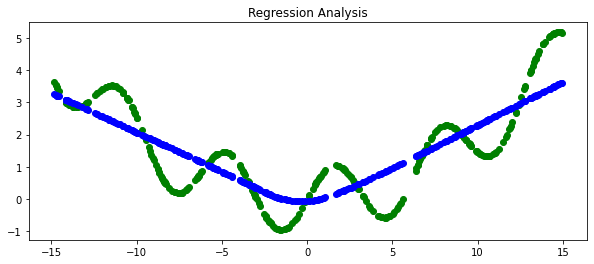

Epoch 50: train loss: 0.6756808757781982
Epoch 51: train loss: 0.6769864559173584
Epoch 52: train loss: 0.6748928427696228
Epoch 53: train loss: 0.6694537997245789
Epoch 54: train loss: 0.6622333526611328
Epoch 55: train loss: 0.6552572250366211
Epoch 56: train loss: 0.650194525718689
Epoch 57: train loss: 0.6475473642349243
Epoch 58: train loss: 0.6465829610824585
Epoch 59: train loss: 0.6458444595336914
Epoch 60: train loss: 0.6439605355262756
Epoch 61: train loss: 0.6403844952583313
Epoch 62: train loss: 0.6355487108230591
Epoch 63: train loss: 0.6303781867027283
Epoch 64: train loss: 0.6259384751319885
Epoch 65: train loss: 0.6226953268051147
Epoch 66: train loss: 0.620405912399292
Epoch 67: train loss: 0.6183772087097168
Epoch 68: train loss: 0.6158490180969238
Epoch 69: train loss: 0.612391471862793
Epoch 70: train loss: 0.6080941557884216
Epoch 71: train loss: 0.6042739748954773
Epoch 72: train loss: 0.599213719367981
Epoch 73: train loss: 0.5961775183677673
Epoch 74: train loss

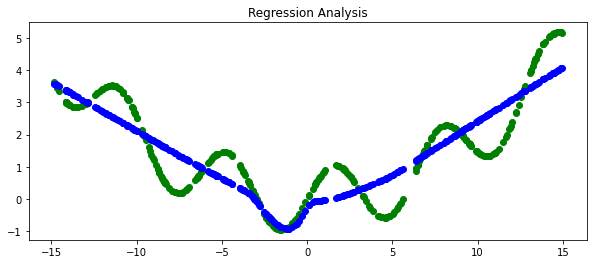

Epoch 100: train loss: 0.5379722118377686
Epoch 101: train loss: 0.5365573167800903
Epoch 102: train loss: 0.5349617004394531
Epoch 103: train loss: 0.5335448384284973
Epoch 104: train loss: 0.5309919714927673
Epoch 105: train loss: 0.529888927936554
Epoch 106: train loss: 0.5275396108627319
Epoch 107: train loss: 0.5260466933250427
Epoch 108: train loss: 0.5245957970619202
Epoch 109: train loss: 0.5219399333000183
Epoch 110: train loss: 0.5200157165527344
Epoch 111: train loss: 0.5182387232780457
Epoch 112: train loss: 0.5153883099555969
Epoch 113: train loss: 0.5123881697654724
Epoch 114: train loss: 0.5100967288017273
Epoch 115: train loss: 0.506253182888031
Epoch 116: train loss: 0.5008379220962524
Epoch 117: train loss: 0.5012977123260498
Epoch 118: train loss: 0.5028242468833923
Epoch 119: train loss: 0.4977509081363678
Epoch 120: train loss: 0.48709434270858765
Epoch 121: train loss: 0.4901905953884125
Epoch 122: train loss: 0.48009219765663147
Epoch 123: train loss: 0.476821720

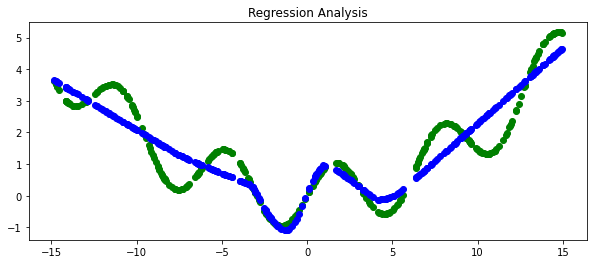

Epoch 150: train loss: 0.38859304785728455
Epoch 151: train loss: 0.3875337541103363
Epoch 152: train loss: 0.3866334855556488
Epoch 153: train loss: 0.38490164279937744
Epoch 154: train loss: 0.3829402029514313
Epoch 155: train loss: 0.38406458497047424
Epoch 156: train loss: 0.3961789011955261
Epoch 157: train loss: 0.3914804458618164
Epoch 158: train loss: 0.3799465000629425
Epoch 159: train loss: 0.39116328954696655
Epoch 160: train loss: 0.3781726062297821
Epoch 161: train loss: 0.38816946744918823
Epoch 162: train loss: 0.37661033868789673
Epoch 163: train loss: 0.3825122117996216
Epoch 164: train loss: 0.37163007259368896
Epoch 165: train loss: 0.37661170959472656
Epoch 166: train loss: 0.3692740797996521
Epoch 167: train loss: 0.37475085258483887
Epoch 168: train loss: 0.3708251118659973
Epoch 169: train loss: 0.3759330213069916
Epoch 170: train loss: 0.3743172287940979
Epoch 171: train loss: 0.3743916153907776
Epoch 172: train loss: 0.36905229091644287
Epoch 173: train loss: 0

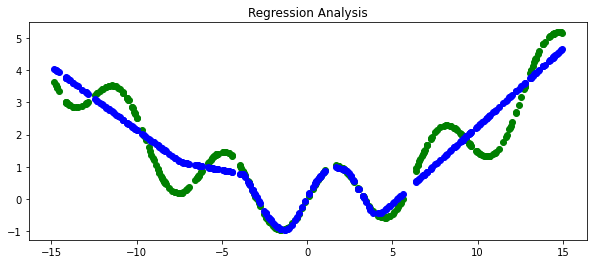

Epoch 200: train loss: 0.3545350730419159
Epoch 201: train loss: 0.3479381799697876
Epoch 202: train loss: 0.3453710675239563
Epoch 203: train loss: 0.347649484872818
Epoch 204: train loss: 0.35109639167785645
Epoch 205: train loss: 0.35074302554130554
Epoch 206: train loss: 0.3466043770313263
Epoch 207: train loss: 0.3429558575153351
Epoch 208: train loss: 0.34311443567276
Epoch 209: train loss: 0.3454408645629883
Epoch 210: train loss: 0.34655871987342834
Epoch 211: train loss: 0.3446975648403168
Epoch 212: train loss: 0.34198102355003357
Epoch 213: train loss: 0.339975506067276
Epoch 214: train loss: 0.340485543012619
Epoch 215: train loss: 0.34187376499176025
Epoch 216: train loss: 0.34265580773353577
Epoch 217: train loss: 0.3418910503387451
Epoch 218: train loss: 0.339969277381897
Epoch 219: train loss: 0.3380754888057709
Epoch 220: train loss: 0.3369292914867401
Epoch 221: train loss: 0.33672815561294556
Epoch 222: train loss: 0.33723801374435425
Epoch 223: train loss: 0.3379734

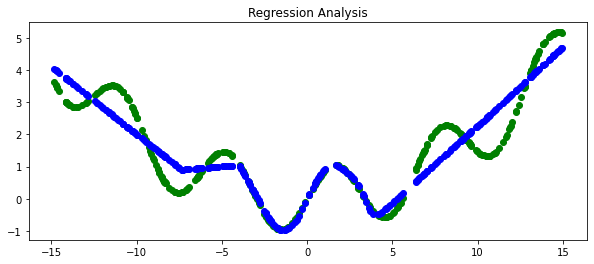

Epoch 250: train loss: 0.32769089937210083
Epoch 251: train loss: 0.32603898644447327
Epoch 252: train loss: 0.32592183351516724
Epoch 253: train loss: 0.32691872119903564
Epoch 254: train loss: 0.32839691638946533
Epoch 255: train loss: 0.32978498935699463
Epoch 256: train loss: 0.3307085633277893
Epoch 257: train loss: 0.33067333698272705
Epoch 258: train loss: 0.32963672280311584
Epoch 259: train loss: 0.32764163613319397
Epoch 260: train loss: 0.32546141743659973
Epoch 261: train loss: 0.3237287402153015
Epoch 262: train loss: 0.32286056876182556
Epoch 263: train loss: 0.32279151678085327
Epoch 264: train loss: 0.3233121335506439
Epoch 265: train loss: 0.32429805397987366
Epoch 266: train loss: 0.3256811201572418
Epoch 267: train loss: 0.3275443911552429
Epoch 268: train loss: 0.3298155963420868
Epoch 269: train loss: 0.3320624828338623
Epoch 270: train loss: 0.33319512009620667
Epoch 271: train loss: 0.3319072723388672
Epoch 272: train loss: 0.32787102460861206
Epoch 273: train lo

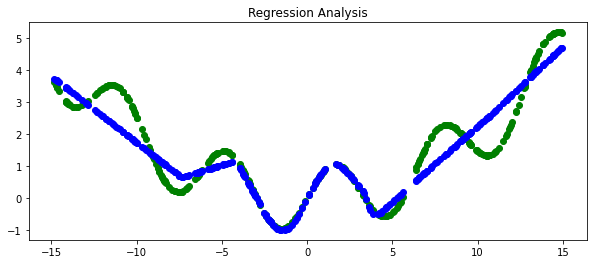

Epoch 300: train loss: 0.3242103159427643
Epoch 301: train loss: 0.3274393677711487
Epoch 302: train loss: 0.3296221196651459
Epoch 303: train loss: 0.3284080922603607
Epoch 304: train loss: 0.3232606053352356
Epoch 305: train loss: 0.31644606590270996
Epoch 306: train loss: 0.31223800778388977
Epoch 307: train loss: 0.3126084804534912
Epoch 308: train loss: 0.3159119784832001
Epoch 309: train loss: 0.31896448135375977
Epoch 310: train loss: 0.3191886842250824
Epoch 311: train loss: 0.31645262241363525
Epoch 312: train loss: 0.31263548135757446
Epoch 313: train loss: 0.31037330627441406
Epoch 314: train loss: 0.3105923533439636
Epoch 315: train loss: 0.3123181164264679
Epoch 316: train loss: 0.31398096680641174
Epoch 317: train loss: 0.31423619389533997
Epoch 318: train loss: 0.3130246698856354
Epoch 319: train loss: 0.31102877855300903
Epoch 320: train loss: 0.3092588186264038
Epoch 321: train loss: 0.30841562151908875
Epoch 322: train loss: 0.3084002137184143
Epoch 323: train loss: 0

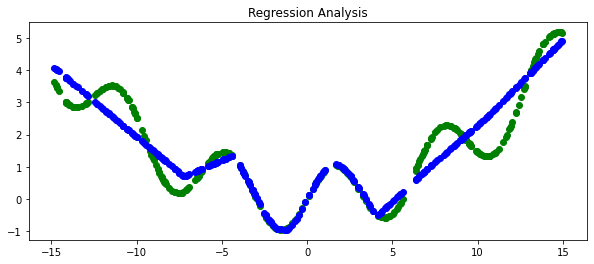

Epoch 350: train loss: 0.30362075567245483
Epoch 351: train loss: 0.3082055449485779
Epoch 352: train loss: 0.3139958679676056
Epoch 353: train loss: 0.3136456608772278
Epoch 354: train loss: 0.30637437105178833
Epoch 355: train loss: 0.30155667662620544
Epoch 356: train loss: 0.30436939001083374
Epoch 357: train loss: 0.3074789345264435
Epoch 358: train loss: 0.3051144778728485
Epoch 359: train loss: 0.300564706325531
Epoch 360: train loss: 0.30009302496910095
Epoch 361: train loss: 0.3026669919490814
Epoch 362: train loss: 0.30268213152885437
Epoch 363: train loss: 0.2995896339416504
Epoch 364: train loss: 0.29762840270996094
Epoch 365: train loss: 0.2989394962787628
Epoch 366: train loss: 0.30018216371536255
Epoch 367: train loss: 0.2988806664943695
Epoch 368: train loss: 0.2962627410888672
Epoch 369: train loss: 0.29557865858078003
Epoch 370: train loss: 0.29662778973579407
Epoch 371: train loss: 0.29714563488960266
Epoch 372: train loss: 0.29590675234794617
Epoch 373: train loss: 

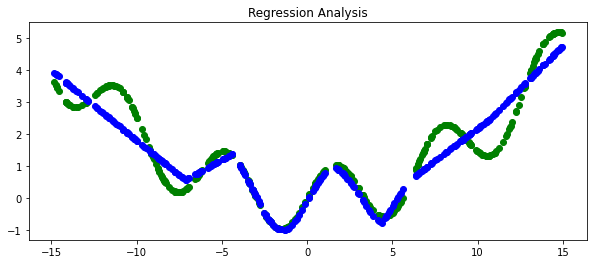

Epoch 400: train loss: 0.2841304540634155
Epoch 401: train loss: 0.28549516201019287
Epoch 402: train loss: 0.28162696957588196
Epoch 403: train loss: 0.28167301416397095
Epoch 404: train loss: 0.2824358642101288
Epoch 405: train loss: 0.2843477427959442
Epoch 406: train loss: 0.2809809744358063
Epoch 407: train loss: 0.281101256608963
Epoch 408: train loss: 0.280121773481369
Epoch 409: train loss: 0.2794972360134125
Epoch 410: train loss: 0.27914369106292725
Epoch 411: train loss: 0.27688807249069214
Epoch 412: train loss: 0.2749023735523224
Epoch 413: train loss: 0.27336177229881287
Epoch 414: train loss: 0.27172982692718506
Epoch 415: train loss: 0.2713443338871002
Epoch 416: train loss: 0.2700582444667816
Epoch 417: train loss: 0.2698400318622589
Epoch 418: train loss: 0.2691172659397125
Epoch 419: train loss: 0.2686084508895874
Epoch 420: train loss: 0.2690223157405853
Epoch 421: train loss: 0.2689361274242401
Epoch 422: train loss: 0.2693116068840027
Epoch 423: train loss: 0.2701

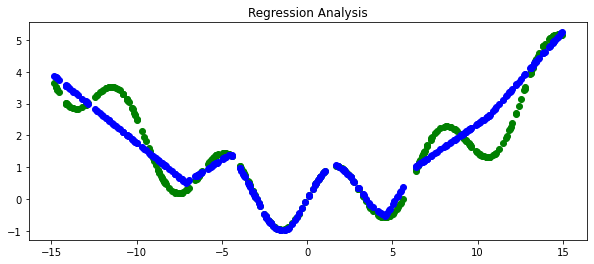

Epoch 450: train loss: 0.28120118379592896
Epoch 451: train loss: 0.2905281186103821
Epoch 452: train loss: 0.25120648741722107
Epoch 453: train loss: 0.26950833201408386
Epoch 454: train loss: 0.2778581380844116
Epoch 455: train loss: 0.25182420015335083
Epoch 456: train loss: 0.27016589045524597
Epoch 457: train loss: 0.2630821466445923
Epoch 458: train loss: 0.24802422523498535
Epoch 459: train loss: 0.26402464509010315
Epoch 460: train loss: 0.2512398362159729
Epoch 461: train loss: 0.25171422958374023
Epoch 462: train loss: 0.25974535942077637
Epoch 463: train loss: 0.2466440200805664
Epoch 464: train loss: 0.252933531999588
Epoch 465: train loss: 0.25076308846473694
Epoch 466: train loss: 0.24354547262191772
Epoch 467: train loss: 0.2507290542125702
Epoch 468: train loss: 0.24497783184051514
Epoch 469: train loss: 0.2444259375333786
Epoch 470: train loss: 0.24832722544670105
Epoch 471: train loss: 0.2422764152288437
Epoch 472: train loss: 0.24437415599822998
Epoch 473: train loss

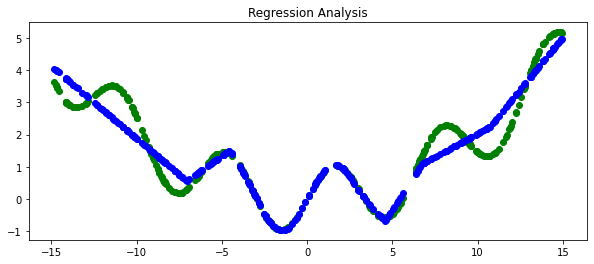

Epoch 500: train loss: 0.2253778874874115
Epoch 501: train loss: 0.22763249278068542
Epoch 502: train loss: 0.23211421072483063
Epoch 503: train loss: 0.23433750867843628
Epoch 504: train loss: 0.23230747878551483
Epoch 505: train loss: 0.22752909362316132
Epoch 506: train loss: 0.22321772575378418
Epoch 507: train loss: 0.22189021110534668
Epoch 508: train loss: 0.22322344779968262
Epoch 509: train loss: 0.2250482439994812
Epoch 510: train loss: 0.2252061665058136
Epoch 511: train loss: 0.22315862774848938
Epoch 512: train loss: 0.2202509194612503
Epoch 513: train loss: 0.21826502680778503
Epoch 514: train loss: 0.21798230707645416
Epoch 515: train loss: 0.2187720388174057
Epoch 516: train loss: 0.2193082571029663
Epoch 517: train loss: 0.21879765391349792
Epoch 518: train loss: 0.21721172332763672
Epoch 519: train loss: 0.21543926000595093
Epoch 520: train loss: 0.2142130434513092
Epoch 521: train loss: 0.21385376155376434
Epoch 522: train loss: 0.21412000060081482
Epoch 523: train l

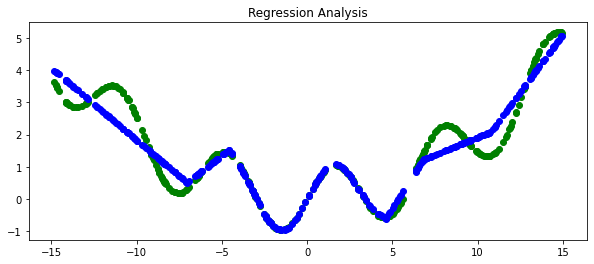

Epoch 550: train loss: 0.20166990160942078
Epoch 551: train loss: 0.2064916491508484
Epoch 552: train loss: 0.20504991710186005
Epoch 553: train loss: 0.19976802170276642
Epoch 554: train loss: 0.20097637176513672
Epoch 555: train loss: 0.20350345969200134
Epoch 556: train loss: 0.20044414699077606
Epoch 557: train loss: 0.19815154373645782
Epoch 558: train loss: 0.20054791867733002
Epoch 559: train loss: 0.2011050581932068
Epoch 560: train loss: 0.198658749461174
Epoch 561: train loss: 0.1985735446214676
Epoch 562: train loss: 0.20103086531162262
Epoch 563: train loss: 0.2023514211177826
Epoch 564: train loss: 0.20297814905643463
Epoch 565: train loss: 0.20671816170215607
Epoch 566: train loss: 0.21356560289859772
Epoch 567: train loss: 0.2210702896118164
Epoch 568: train loss: 0.2273077666759491
Epoch 569: train loss: 0.2307867407798767
Epoch 570: train loss: 0.22617512941360474
Epoch 571: train loss: 0.21265368163585663
Epoch 572: train loss: 0.1972111016511917
Epoch 573: train loss

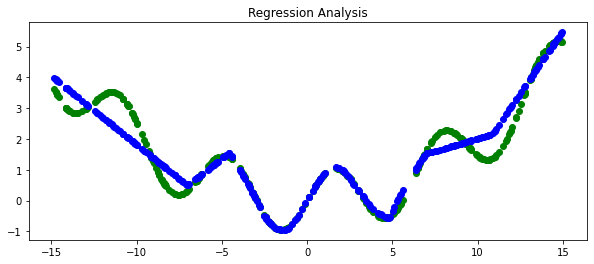

Epoch 600: train loss: 0.18889063596725464
Epoch 601: train loss: 0.19169607758522034
Epoch 602: train loss: 0.19614599645137787
Epoch 603: train loss: 0.2003365159034729
Epoch 604: train loss: 0.2025507092475891
Epoch 605: train loss: 0.19985955953598022
Epoch 606: train loss: 0.19288690388202667
Epoch 607: train loss: 0.18490196764469147
Epoch 608: train loss: 0.1797843873500824
Epoch 609: train loss: 0.17866696417331696
Epoch 610: train loss: 0.17983423173427582
Epoch 611: train loss: 0.18141408264636993
Epoch 612: train loss: 0.18271583318710327
Epoch 613: train loss: 0.183994859457016
Epoch 614: train loss: 0.1844290792942047
Epoch 615: train loss: 0.18376639485359192
Epoch 616: train loss: 0.1814550757408142
Epoch 617: train loss: 0.17797763645648956
Epoch 618: train loss: 0.1744464486837387
Epoch 619: train loss: 0.17211513221263885
Epoch 620: train loss: 0.17163725197315216
Epoch 621: train loss: 0.17250309884548187
Epoch 622: train loss: 0.17382201552391052
Epoch 623: train lo

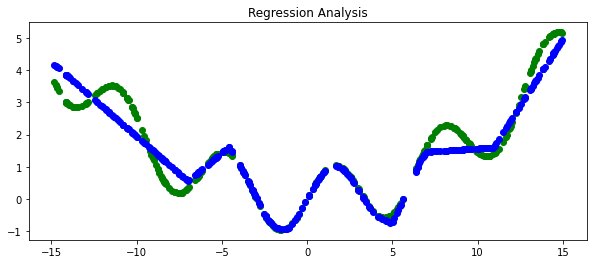

Epoch 650: train loss: 0.19133347272872925
Epoch 651: train loss: 0.20233102142810822
Epoch 652: train loss: 0.2091062217950821
Epoch 653: train loss: 0.2091626226902008
Epoch 654: train loss: 0.19896581768989563
Epoch 655: train loss: 0.18593262135982513
Epoch 656: train loss: 0.17537762224674225
Epoch 657: train loss: 0.16897882521152496
Epoch 658: train loss: 0.16629885137081146
Epoch 659: train loss: 0.16825735569000244
Epoch 660: train loss: 0.17407561838626862
Epoch 661: train loss: 0.17830708622932434
Epoch 662: train loss: 0.17559503018856049
Epoch 663: train loss: 0.16652391850948334
Epoch 664: train loss: 0.15911510586738586
Epoch 665: train loss: 0.15928854048252106
Epoch 666: train loss: 0.16449856758117676
Epoch 667: train loss: 0.167734295129776
Epoch 668: train loss: 0.16571907699108124
Epoch 669: train loss: 0.1618238240480423
Epoch 670: train loss: 0.16039104759693146
Epoch 671: train loss: 0.16119971871376038
Epoch 672: train loss: 0.16103065013885498
Epoch 673: train

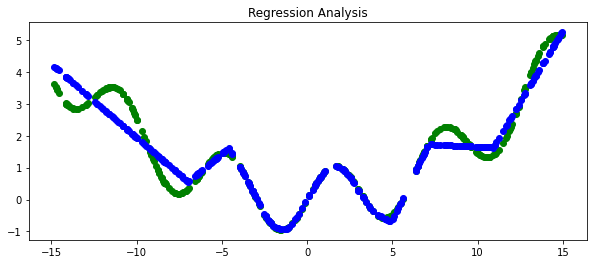

Epoch 700: train loss: 0.1572950929403305
Epoch 701: train loss: 0.15955416858196259
Epoch 702: train loss: 0.16135913133621216
Epoch 703: train loss: 0.1624932587146759
Epoch 704: train loss: 0.16217344999313354
Epoch 705: train loss: 0.16069984436035156
Epoch 706: train loss: 0.15822263062000275
Epoch 707: train loss: 0.15567561984062195
Epoch 708: train loss: 0.15327686071395874
Epoch 709: train loss: 0.15134431421756744
Epoch 710: train loss: 0.14980444312095642
Epoch 711: train loss: 0.14878641068935394
Epoch 712: train loss: 0.14833971858024597
Epoch 713: train loss: 0.1483858823776245
Epoch 714: train loss: 0.1487240046262741
Epoch 715: train loss: 0.1492231786251068
Epoch 716: train loss: 0.149962916970253
Epoch 717: train loss: 0.15113255381584167
Epoch 718: train loss: 0.15319804847240448
Epoch 719: train loss: 0.1564626842737198
Epoch 720: train loss: 0.16171938180923462
Epoch 721: train loss: 0.1693742871284485
Epoch 722: train loss: 0.18028859794139862
Epoch 723: train los

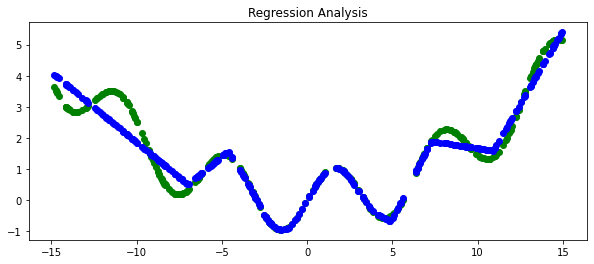

Epoch 750: train loss: 0.14450298249721527
Epoch 751: train loss: 0.14322689175605774
Epoch 752: train loss: 0.14364098012447357
Epoch 753: train loss: 0.1448802649974823
Epoch 754: train loss: 0.14585641026496887
Epoch 755: train loss: 0.14612601697444916
Epoch 756: train loss: 0.14597001671791077
Epoch 757: train loss: 0.14556412398815155
Epoch 758: train loss: 0.14491991698741913
Epoch 759: train loss: 0.1439816653728485
Epoch 760: train loss: 0.14297395944595337
Epoch 761: train loss: 0.14224213361740112
Epoch 762: train loss: 0.14194324612617493
Epoch 763: train loss: 0.14193804562091827
Epoch 764: train loss: 0.14198973774909973
Epoch 765: train loss: 0.14201155304908752
Epoch 766: train loss: 0.14210109412670135
Epoch 767: train loss: 0.1423974335193634
Epoch 768: train loss: 0.14294791221618652
Epoch 769: train loss: 0.14375004172325134
Epoch 770: train loss: 0.1448916792869568
Epoch 771: train loss: 0.14664801955223083
Epoch 772: train loss: 0.14952696859836578
Epoch 773: trai

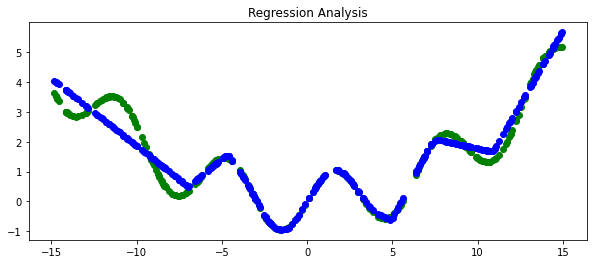

Epoch 800: train loss: 0.14169467985630035
Epoch 801: train loss: 0.14067474007606506
Epoch 802: train loss: 0.1403895765542984
Epoch 803: train loss: 0.14045721292495728
Epoch 804: train loss: 0.14121432602405548
Epoch 805: train loss: 0.14225544035434723
Epoch 806: train loss: 0.14217354357242584
Epoch 807: train loss: 0.14057332277297974
Epoch 808: train loss: 0.13867925107479095
Epoch 809: train loss: 0.1380501389503479
Epoch 810: train loss: 0.1387491524219513
Epoch 811: train loss: 0.13966016471385956
Epoch 812: train loss: 0.13995300233364105
Epoch 813: train loss: 0.13966405391693115
Epoch 814: train loss: 0.1392669826745987
Epoch 815: train loss: 0.13884353637695312
Epoch 816: train loss: 0.13828961551189423
Epoch 817: train loss: 0.137681782245636
Epoch 818: train loss: 0.13734571635723114
Epoch 819: train loss: 0.1374586522579193
Epoch 820: train loss: 0.13781972229480743
Epoch 821: train loss: 0.13808469474315643
Epoch 822: train loss: 0.13811184465885162
Epoch 823: train l

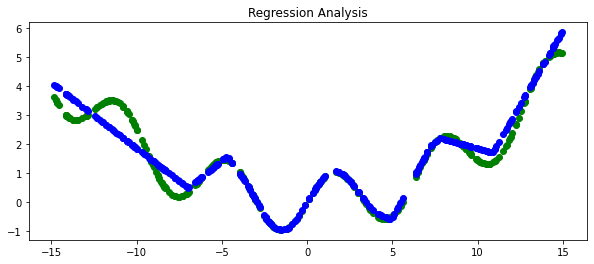

Epoch 850: train loss: 0.15024490654468536
Epoch 851: train loss: 0.1670575886964798
Epoch 852: train loss: 0.17443326115608215
Epoch 853: train loss: 0.1663070172071457
Epoch 854: train loss: 0.15072552859783173
Epoch 855: train loss: 0.13983695209026337
Epoch 856: train loss: 0.1420210748910904
Epoch 857: train loss: 0.1523788571357727
Epoch 858: train loss: 0.15713267028331757
Epoch 859: train loss: 0.14941354095935822
Epoch 860: train loss: 0.13793562352657318
Epoch 861: train loss: 0.13624083995819092
Epoch 862: train loss: 0.14379467070102692
Epoch 863: train loss: 0.14834511280059814
Epoch 864: train loss: 0.14393244683742523
Epoch 865: train loss: 0.13722896575927734
Epoch 866: train loss: 0.13624079525470734
Epoch 867: train loss: 0.13952983915805817
Epoch 868: train loss: 0.14117412269115448
Epoch 869: train loss: 0.1397990584373474
Epoch 870: train loss: 0.1379745751619339
Epoch 871: train loss: 0.13706040382385254
Epoch 872: train loss: 0.1365286111831665
Epoch 873: train l

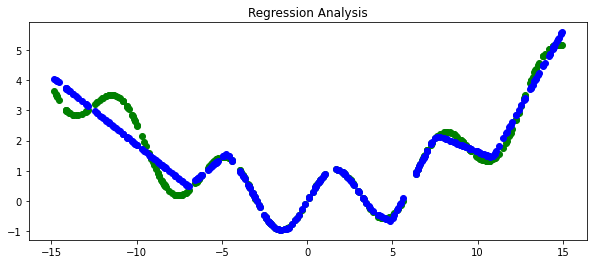

Epoch 900: train loss: 0.13350695371627808
Epoch 901: train loss: 0.13342858850955963
Epoch 902: train loss: 0.13346873223781586
Epoch 903: train loss: 0.13354003429412842
Epoch 904: train loss: 0.1335594356060028
Epoch 905: train loss: 0.13352787494659424
Epoch 906: train loss: 0.1334943175315857
Epoch 907: train loss: 0.13347819447517395
Epoch 908: train loss: 0.13344936072826385
Epoch 909: train loss: 0.13338419795036316
Epoch 910: train loss: 0.13329419493675232
Epoch 911: train loss: 0.13321734964847565
Epoch 912: train loss: 0.1331687867641449
Epoch 913: train loss: 0.13313555717468262
Epoch 914: train loss: 0.13309794664382935
Epoch 915: train loss: 0.1330561339855194
Epoch 916: train loss: 0.13302817940711975
Epoch 917: train loss: 0.13303129374980927
Epoch 918: train loss: 0.13307024538516998
Epoch 919: train loss: 0.13315096497535706
Epoch 920: train loss: 0.13329069316387177
Epoch 921: train loss: 0.13354435563087463
Epoch 922: train loss: 0.13399939239025116
Epoch 923: trai

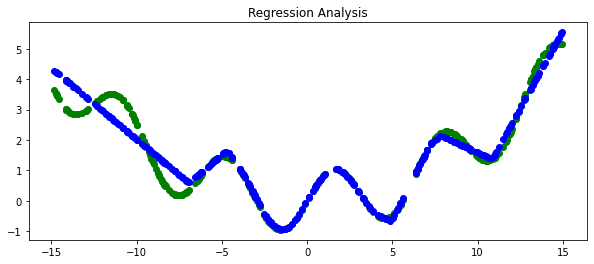

Epoch 950: train loss: 0.14172476530075073
Epoch 951: train loss: 0.13291636109352112
Epoch 952: train loss: 0.1354002207517624
Epoch 953: train loss: 0.14198808372020721
Epoch 954: train loss: 0.1410515010356903
Epoch 955: train loss: 0.1351471096277237
Epoch 956: train loss: 0.13357503712177277
Epoch 957: train loss: 0.1362696886062622
Epoch 958: train loss: 0.13719621300697327
Epoch 959: train loss: 0.13557259738445282
Epoch 960: train loss: 0.13455431163311005
Epoch 961: train loss: 0.13448716700077057
Epoch 962: train loss: 0.13395632803440094
Epoch 963: train loss: 0.13372577726840973
Epoch 964: train loss: 0.1345549076795578
Epoch 965: train loss: 0.1347389966249466
Epoch 966: train loss: 0.13329806923866272
Epoch 967: train loss: 0.13216739892959595
Epoch 968: train loss: 0.13293859362602234
Epoch 969: train loss: 0.13408838212490082
Epoch 970: train loss: 0.13365556299686432
Epoch 971: train loss: 0.1323668360710144
Epoch 972: train loss: 0.13200506567955017
Epoch 973: train l

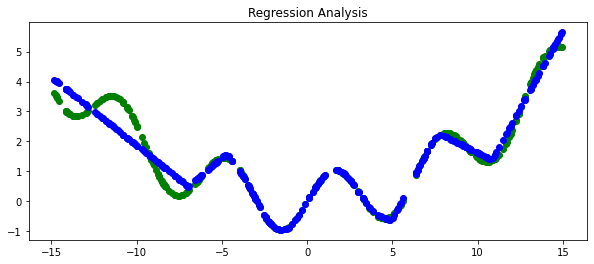

In [8]:
import torch.utils.data as Data

train_loader = Data.DataLoader(dataset=train_set, batch_size=350, shuffle=True, num_workers=2,)
test_loader=Data.DataLoader(dataset=test_set, batch_size=300, shuffle=True, num_workers=2,)

datatiter = iter(train_loader)
data = datatiter.next()
train_x, train_y = data 

datatiter = iter(test_loader)
data = datatiter.next()
test_x, test_y = data 

# define component
net = Net(n_feature=1, n_hidden=200, n_output=1)    
optimizer = torch.optim.Adam(net.parameters(), lr=5e-3)
criterion = torch.nn.MSELoss() 

# train the network
from tqdm.notebook import tqdm
losses=[]
for i in tqdm(range(1000)):
    optimizer.zero_grad() 
    # Forward pass
    y_pred = net(train_x)
    # Compute loss
    loss = criterion(y_pred, train_y)
    # Print loss in each iteration
    print('Epoch {}: train loss: {}'.format(i, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()
    if (((i+1) % 50 == 0) & (i > 0)):
        pred_y = net(train_x)
        plt.figure(figsize=(10,4))
        plt.scatter(tensor2numpy(train_x,0), tensor2numpy(train_y,0), color = "green")
        plt.scatter(tensor2numpy(train_x,0), tensor2numpy(pred_y,0), color = "blue")
        plt.title('Regression Analysis')
        plt.show()

### Extra bonus
Implement either one of the above problems with GPU will have an extra bonus.

### Problem 4.3
Think about one computer vision application for daily life.  
Try to describe the underlaying possible pipiline to support that application.

Virtual mirror: a blended reality display that puts a shopper's images into an augmented scene and 
puts the individual in a virtual dress. 

The transmitted image could show a scene, say a mountain, as software would put the shopper into 
the scene and potentially superimpose virtual clothes onto the reflection of his/her body. 
Face-tracking sensors and softwares would show a realistic image from all angles. 
The shopper can try on any clothes without putting them on.

The pipeline/workflow might be like this:
Scane the environment --> Generate the virtual model of scanned environment --> identify face 
and eyes of users --> determine objects to be seen as a reflection by the user --> display images 
to be transmitted through mirrors and project light onto user and objects in environment

The virtual mirror will use enhanced facial detection to locate and catch eyes' movements
to let the system know what objects the user is watching. Then the algorithm uses these data to control projectors.